### You are provided with 4 images (part1.png, part2.png, part3.png, part4.png) with different contrast levels which correspond to four quadrants of canyon.png as shown in Figure 5. Retrieve the original image(converted to grayscale) using these four images(converted to grayscale) as closely as possible.

In [14]:
%matplotlib inline

import cv2
import numpy as np
from collections import Counter
from PIL import Image
from matplotlib import pyplot as plt
import math

In [15]:
def hist_match(source, template):

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [16]:
img1 = './DIP_2019_A1/part1.png'
img2 = './DIP_2019_A1/part2.png'
img3 = './DIP_2019_A1/part3.png'
img4 = './DIP_2019_A1/part4.png'

img = './DIP_2019_A1/canyon.png'

img1 = cv2.imread(img1, 0)
img2 = cv2.imread(img2, 0)
img3 = cv2.imread(img3, 0)
img4 = cv2.imread(img4, 0)

img = cv2.imread(img, 0)

In [17]:
i1 = img[0:img1.shape[0], 0:img1.shape[1]]

i2 = img[0:img1.shape[0], img1.shape[1]:]

i3 = img[img1.shape[0]:, 0:img1.shape[1]]

i4 = img[img1.shape[0]:, img1.shape[1]:]

In [18]:
matched1 = hist_match(img1, i1)
matched2 = hist_match(img2, i2)
matched3 = hist_match(img3, i3)
matched4 = hist_match(img4, i4)


In [19]:
l = np.concatenate((matched1, matched3), axis=0)
r = np.concatenate((matched2, matched4), axis=0)

vis = np.concatenate((l, r), axis=1)

In [20]:
res = Image.fromarray(vis)

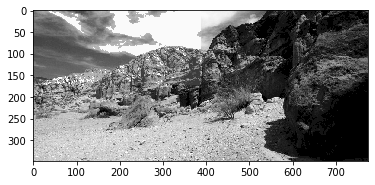

In [22]:
plt.imshow(res, cmap='gray')
plt.show()